<a href="https://colab.research.google.com/github/liuxin96315/c36-2-capston-project-xgboost/blob/master/xgboost_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import xgboost
import xgboost as xgb
import statistics
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost.sklearn import XGBRegressor
import numpy as np
from sklearn.model_selection import train_test_split,cross_validate

from sklearn import  metrics
from sklearn.model_selection import GridSearchCV  

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from google.colab import drive
import pandas as pd
import csv
# connect drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# load data
dataset_train = pd.read_csv('/content/drive/My Drive/capstone/data/part_zone_3month.csv')
#.sample(frac=0.5,axis=0)
dataset_test = pd.read_csv('/content/drive/My Drive/capstone/data/2019test.csv')
print(dataset_train)
x= dataset_train[['month','day','hour','minute','weekday','LocationID']]

y=dataset_train[['15_demand']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2019)

x19_test=dataset_test[['month','day','hour','minute','weekday','LocationID']]
y19_test=dataset_test[['15_demand']]


          Unnamed: 0        pickup_time_g  ...  longitude   latitude
0                  0  2018-06-01 00:00:00  ... -73.977492  40.725843
1                  1  2018-06-01 00:01:00  ... -73.977492  40.725843
2                  2  2018-06-01 00:02:00  ... -73.977492  40.725843
3                  3  2018-06-01 00:03:00  ... -73.977492  40.725843
4                  4  2018-06-01 00:04:00  ... -73.977492  40.725843
...              ...                  ...  ...        ...        ...
16823177      714011  2018-08-31 23:41:00  ... -73.975368  40.787011
16823178      714012  2018-08-31 23:42:00  ... -73.975368  40.787011
16823179      714013  2018-08-31 23:43:00  ... -73.975368  40.787011
16823180      714014  2018-08-31 23:44:00  ... -73.975368  40.787011
16823181      714015  2018-08-31 23:45:00  ... -73.975368  40.787011

[16823182 rows x 19 columns]


In [0]:
#完整a
param_test={'max_depth': [5,6,7,8,9,10,11,12,13,14,15], 'min_child_weight':[1,2,3,4,5,6,7]}

parameters={'objective': 'reg:linear', 
            'learning_rate': 0.1, 
            'n_estimators': 2
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

xgb_grid.best_score_, xgb_grid.best_params_   

In [0]:
#完整b
param_test={'max_depth': [16,17,18,19,20,21,22,23,24], 'min_child_weight':[1,2,3,4,5,6,7]}

parameters={'objective': 'reg:linear', 
            'learning_rate': 0.1, 
            'n_estimators': 1
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

xgb_grid.best_score_, xgb_grid.best_params_   

[14:14:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:30] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[14:16:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:13] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[14:17:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:51] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set t

(-0.09015766053164516, {'max_depth': 18, 'min_child_weight': 7})

In [0]:
#gamma


param_test={'gamma':[i/10.0 for i in range(0,11)]}

parameters={'objective': 'reg:linear', 
            'learning_rate':0.1,
            'max_depth': 24, 
            'min_child_weight': 6,
            'n_estimators': 2
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 


means = xgb_grid.cv_results_['mean_test_score']
params = xgb_grid.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

xgb_grid.best_score_, xgb_grid.best_params_   



[10:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:10] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[10:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:28:43] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[10:34:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:19] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set t

(0.05173596274744226, {'gamma': 1.0})

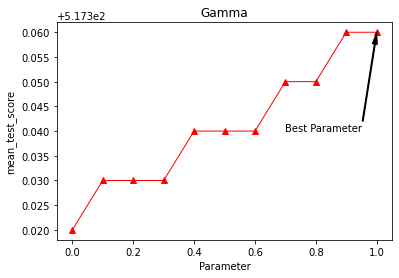

In [0]:
mean=[517.32,517.33,517.33,517.33,517.34,517.34,517.34,517.35,517.35,517.36,517.36]
params=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(params,mean,color="r", linestyle="-", marker="^", linewidth=1)
#图标plt.legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
plt.xlabel("Parameter")
plt.ylabel("mean_test_score")
plt.annotate('Best Parameter', xy=(1.0, 517.36), xytext=(0.7, 517.34), arrowprops=dict(facecolor='k', headwidth=5, width=1))
plt.title("Gamma")
plt.show()


In [0]:

#subsample try again

param_test={'subsample':[i/10.0 for i in range(5,11)]}

parameters={'objective': 'reg:linear', 
            'learning_rate':0.1,
            'max_depth': 24, 
            'min_child_weight': 6,
            #'gamma':0.3,
            'n_estimators': 2
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

means = xgb_grid.cv_results_['mean_test_score']
params = xgb_grid.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

xgb_grid.best_score_, xgb_grid.best_params_  

[10:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:13] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[10:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:20] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[10:41:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:22] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set t

(0.15471852813530151, {'subsample': 1.0})

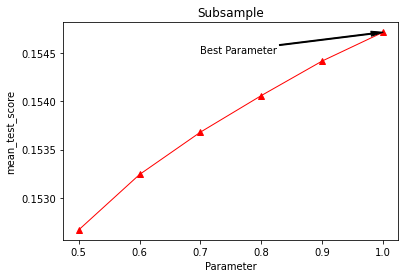

In [0]:
mean=[0.152665,0.153241,0.153681,0.154061,0.154420,0.154719]
params=[0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(params,mean,color="r", linestyle="-", marker="^", linewidth=1)
#图标plt.legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
plt.xlabel("Parameter")
plt.ylabel("mean_test_score")
plt.annotate('Best Parameter', xy=(1.0, 0.154719), xytext=(0.7, 0.1545), arrowprops=dict(facecolor='k', headwidth=5, width=1))
plt.title("Subsample")
plt.show()

In [0]:
#colsample_bytree

param_test={'colsample_bytree':[i/10.0 for i in range(5,11)]}

parameters={'objective': 'reg:linear', 
            #'subsample':1,
            'learning_rate':0.1,
            'max_depth': 18, 
            'min_child_weight': 7,
            #'gamma':0.3,
            'n_estimators': 2
            }

model = xgb.XGBRegressor(**parameters)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_test)
xgb_grid.fit(x_train, y_train) 

#pd.DataFrame(xgb_grid.cv_results_)

means = xgb_grid.cv_results_['mean_test_score']
params = xgb_grid.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

xgb_grid.best_score_, xgb_grid.best_params_   

[07:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:04] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[07:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:48] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[07:51:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:51:30] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set t

(0.05361727729874115, {'colsample_bytree': 1.0})

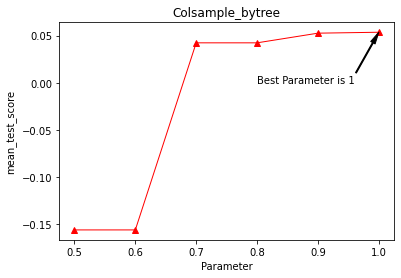

In [0]:
mean=[-0.155964 ,-0.155964 ,0.042390,0.042390 ,0.052635,0.053617]
params=[0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(params,mean,color="r", linestyle="-", marker="^", linewidth=1)
#图标plt.legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
plt.xlabel("Parameter")
plt.ylabel("mean_test_score")
plt.annotate('Best Parameter is 1', xy=(1.0, 0.053617), xytext=(0.8, 0), arrowprops=dict(facecolor='k', headwidth=5, width=1))
plt.title("Colsample_bytree")
plt.show()

In [0]:
#learning_rate （Coarse-Grained）
l_r=[0.01,0.02,0.03,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for value in l_r:
    model = xgb.XGBRegressor(objective= 'reg:linear', 
                            learning_rate= value,
                            max_depth= 18, 
                            min_child_weight=7, 
                            gamma=1, 
                            n_estimators=2,
                            subsample=1, 
                            colsample_bytree=1
                          
                        )
    # fit model no training data
    model.fit(x_train, y_train)

# make predictions for test data
    y_pred = model.predict(x_test)

    


    mae = mean_absolute_error(y_test, y_pred)
    print('Test Mean Absolute Error: %.2f' % (mae))

    mse = mean_squared_error(y_test, y_pred)
    print("Test Mean Square Error: %f" % (mse))
    14.99,14.68,14.38,12.63,10.92,9.92,9.43,9.31,9.37

[02:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:58:25] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test Mean Absolute Error: 15.09
Test Mean Square Error: 1015.680057
[03:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:02:38] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test Mean Absolute Error: 14.88
Test Mean Square Error: 986.164279
[03:06:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:06:56] WARNING: /workspace/src/learner.cc:686: Tree 

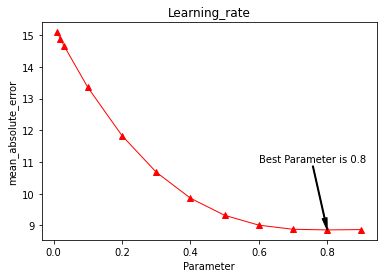

In [0]:
mean=[15.09, 14.88, 14.67, 13.35,11.83,10.68,9.86,9.32,9.01,8.88,8.86,8.87]
params=[0.01,0.02,0.03,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.plot(params,mean,color="r", linestyle="-", marker="^", linewidth=1)
#图标plt.legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
plt.xlabel("Parameter")
plt.ylabel("mean_absolute_error")
plt.annotate('Best Parameter is 0.8', xy=(0.8, 8.86), xytext=(0.6,11), arrowprops=dict(facecolor='k', headwidth=5, width=1))
plt.title("Learning_rate")
plt.show()

In [0]:
#alpha
l_r=[5,10,15,20]

for value in l_r:
    model = xgb.XGBRegressor(objective= 'reg:linear', 
                            learning_rate= 0.5,
                            max_depth= 24, 
                            min_child_weight=6, 
                            gamma=1, 
                            n_estimators=3, #4
                            subsample=0.5, 
                            colsample_bytree=1,
                            alpha=value
                          
                        )
    # fit model no training data
    model.fit(x_train, y_train)

# make predictions for test data
    y_pred = model.predict(x_test)

    


    mae = mean_absolute_error(y_test, y_pred)
    print('Test Mean Absolute Error: %.2f' % (mae))

    mse = mean_squared_error(y_test, y_pred)
    print("Test Mean Square Error: %f" % (mse)) 

[03:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:18:40] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test Mean Absolute Error: 2.72
Test Mean Square Error: 39.339074
[03:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:30:31] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test Mean Absolute Error: 2.72
Test Mean Square Error: 39.339074
[03:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:42:39] WARNING: /workspace/src/learner.cc:686: Tree metho

In [0]:
#n_estimators
model = xgb.XGBRegressor(objective= 'reg:linear', 
                         learning_rate= 0.8,
                         max_depth= 18, 
                        min_child_weight=7, 
                        gamma=1, 
                        subsample=1, #86
                        colsample_bytree=1, n_estimators=1000)  
   
model.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), (x_test, y_test)], 
        eval_metric='rmse', 
        early_stopping_rounds=10, 
        verbose=True )     
evals_result = model.evals_result()   

[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:57:49] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:17.1729	validation_1-rmse:17.4455
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:16.1365	validation_1-rmse:16.6659
[2]	validation_0-rmse:16.013	validation_1-rmse:16.7881
[3]	validation_0-rmse:15.9559	validation_1-rmse:16.9782
[4]	validation_0-rmse:15.91	validation_1-rmse:17.1528
[5]	validation_0-rmse:15.8789	validation_1-rmse:17.2871
[6]	validation_0-rmse:15.8431	validation_1-rmse:17.5576
[7]	validation_0-rmse:15.8291	validation_1-rmse:17.6872
[8]	validation_0-rmse:15.7942	validation_1-rmse:17.9776

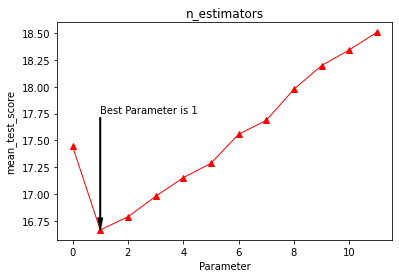

In [0]:
mean=[17.4455,16.6659,16.7881,16.9782,17.1528,17.2871,17.5576,17.6872,17.9776,18.1983,18.3441,18.5088]
params=[0,1,2,3,4,5,6,7,8,9,10,11]
plt.plot(params,mean,color="r", linestyle="-", marker="^", linewidth=1)
#图标plt.legend(loc='upper left', bbox_to_anchor=(0.2, 0.95))
plt.xlabel("Parameter")
plt.ylabel("mean_test_score")
plt.annotate('Best Parameter is 1', xy=(1,16.6659), xytext=(1,17.75), arrowprops=dict(facecolor='k', headwidth=5, width=1))
plt.title("n_estimators")
plt.show()

In [0]:
model = xgb.XGBRegressor(objective= 'reg:linear', 
                        learning_rate= 0.8, 
                        max_depth= 18, 
                        min_child_weight=7, 
                        gamma=1, 
                        n_estimators=1,
                        subsample=1, 
                        colsample_bytree=1
                        )


# fit model no training data
model.fit(x_train, y_train)



[23:54:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:54:51] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.8, max_delta_step=0,
             max_depth=18, min_child_weight=7, missing=None, n_estimators=1,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
# make predictions for test data
y18_pred = model.predict(x_test)

yTrain_pred=model.predict(x_train)
#yValidation_t=[v for v in yValidation_t['15_demand']]

mae = mean_absolute_error(y_train, yTrain_pred)
print('Train 2018 Mean Absolute Error: %.2f' % (mae))

mse = mean_squared_error(y_train, yTrain_pred)
print("Train 2018 Mean Square Error: %f" % (mse))

mae = mean_absolute_error(y_test, y18_pred)
print('Test 2018 Mean Absolute Error: %.2f' % (mae))

mse = mean_squared_error(y_test, y18_pred)
print("Test 2018 Mean Square Error: %f" % (mse))



Train 2018 Mean Absolute Error: 9.02
Train 2018 Mean Square Error: 299.398827
Test 2018 Mean Absolute Error: 9.12
Test 2018 Mean Square Error: 304.846227


In [0]:

# make predictions for test data
y19_pred = model.predict(x19_test)

mae = mean_absolute_error(y19_test, y19_pred)
print('Test 2019 Mean Absolute Error: %.2f' % (mae))

mse = mean_squared_error(y19_test, y19_pred)
print("Test 2019 Mean Square Error: %f" % (mse))


Test 2019 Mean Absolute Error: 7.14
Test 2019 Mean Square Error: 180.863406


In [0]:
 y19_pred = model.predict(x19_test)
y_t19=[v for v in y19_test['15_demand']]  
 ii=np.abs(y19_pred-y_t19)
 bb=np.abs(y_t19+y19_pred)
 smape = 1/168232 * np.sum(2 * ii / bb)
 print("Test 2019 sMAPE: %f" % (smape))

Test 2019 sMAPE: 1.250370


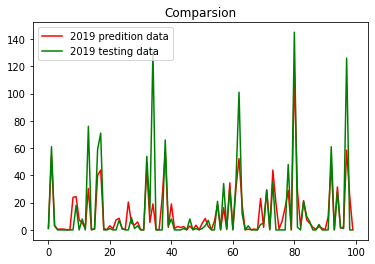

In [0]:
l1,=plt.plot(range(100),y19_pred[0:100], c='r')
l2,=plt.plot(range(100),y19_test[0:100], c='g')
plt.legend((l1,l2),('2019 predition data','2019 testing data'),loc='best')
plt.title("Comparsion")
plt.show()

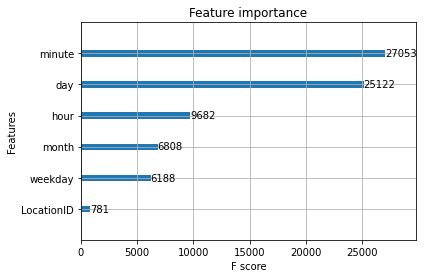

In [0]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()